In [1]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader

/media/cheshmeh/Project/adv_Project/MVTec /mvtec_env/lib/python3.12/site-packages/torch/cuda/__init__.py:182: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


Epoch [1/1], Loss: 3.4342


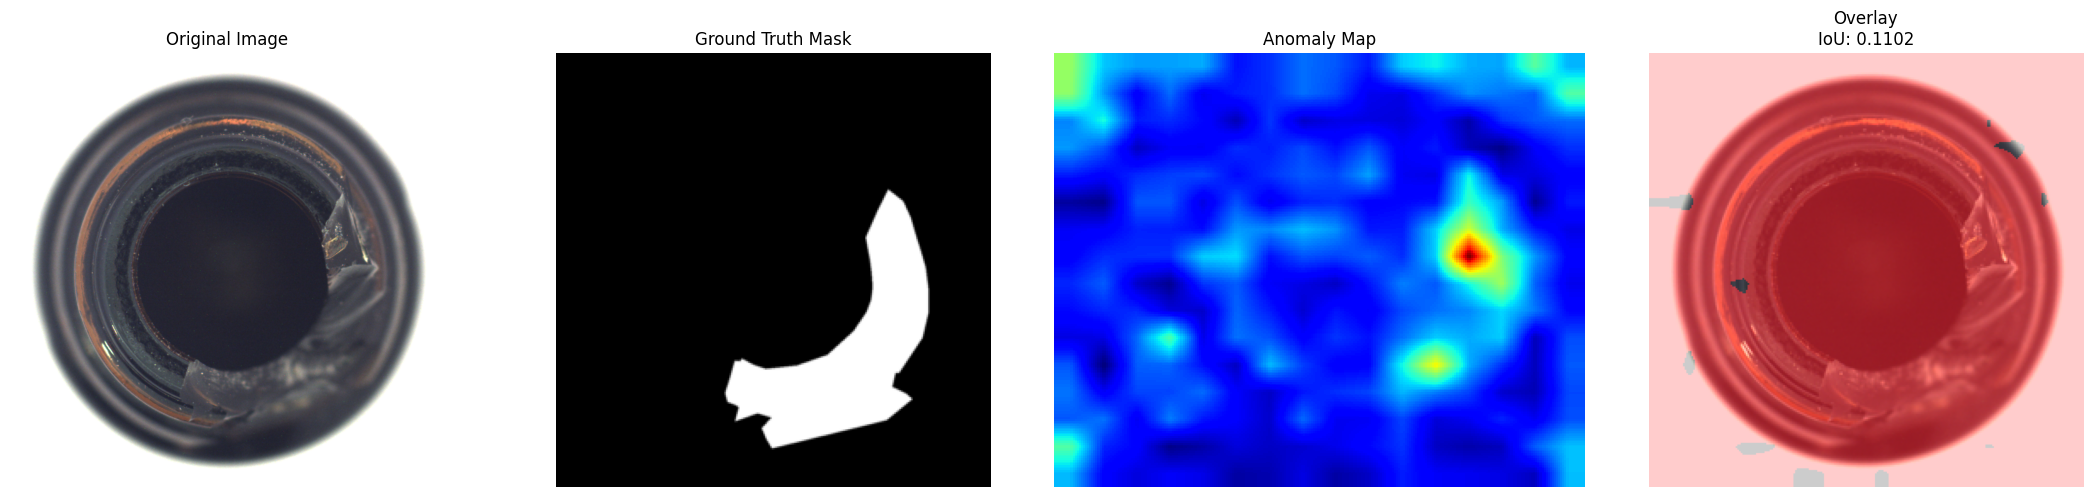

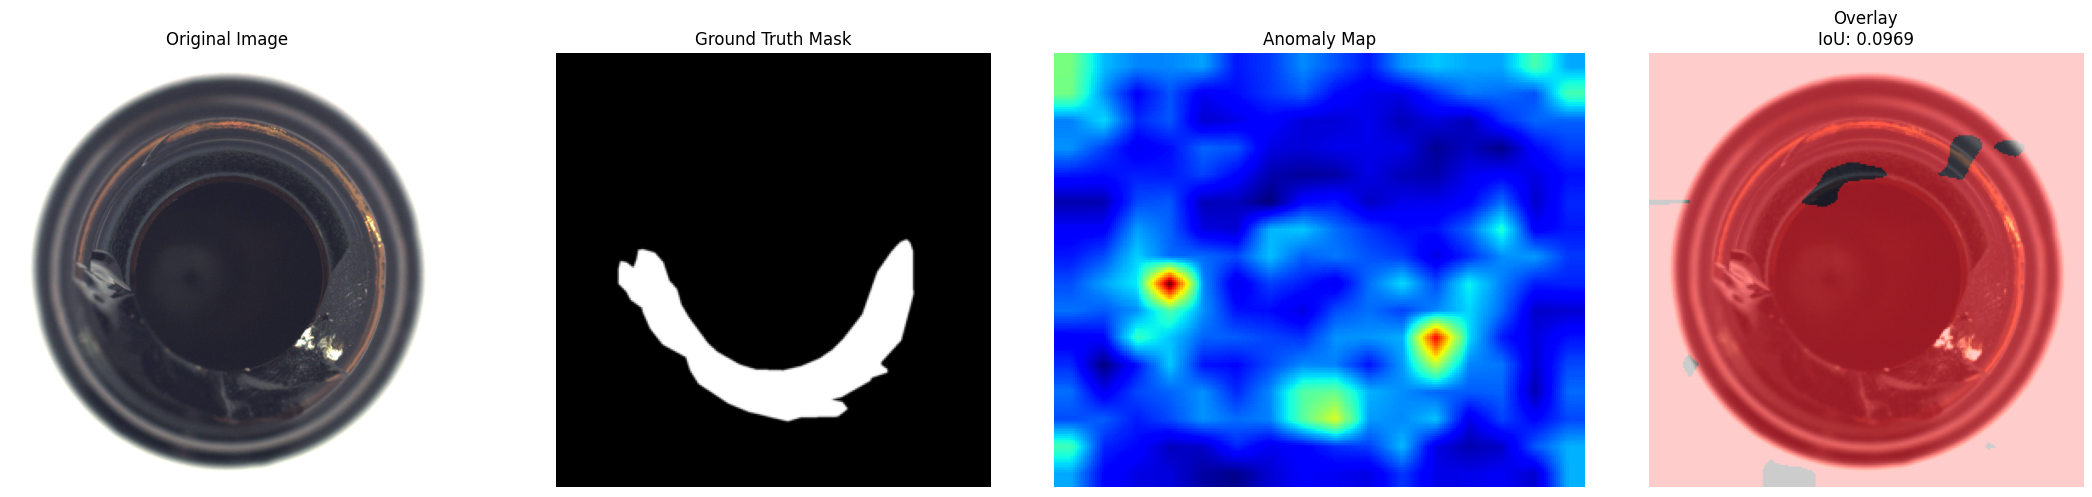

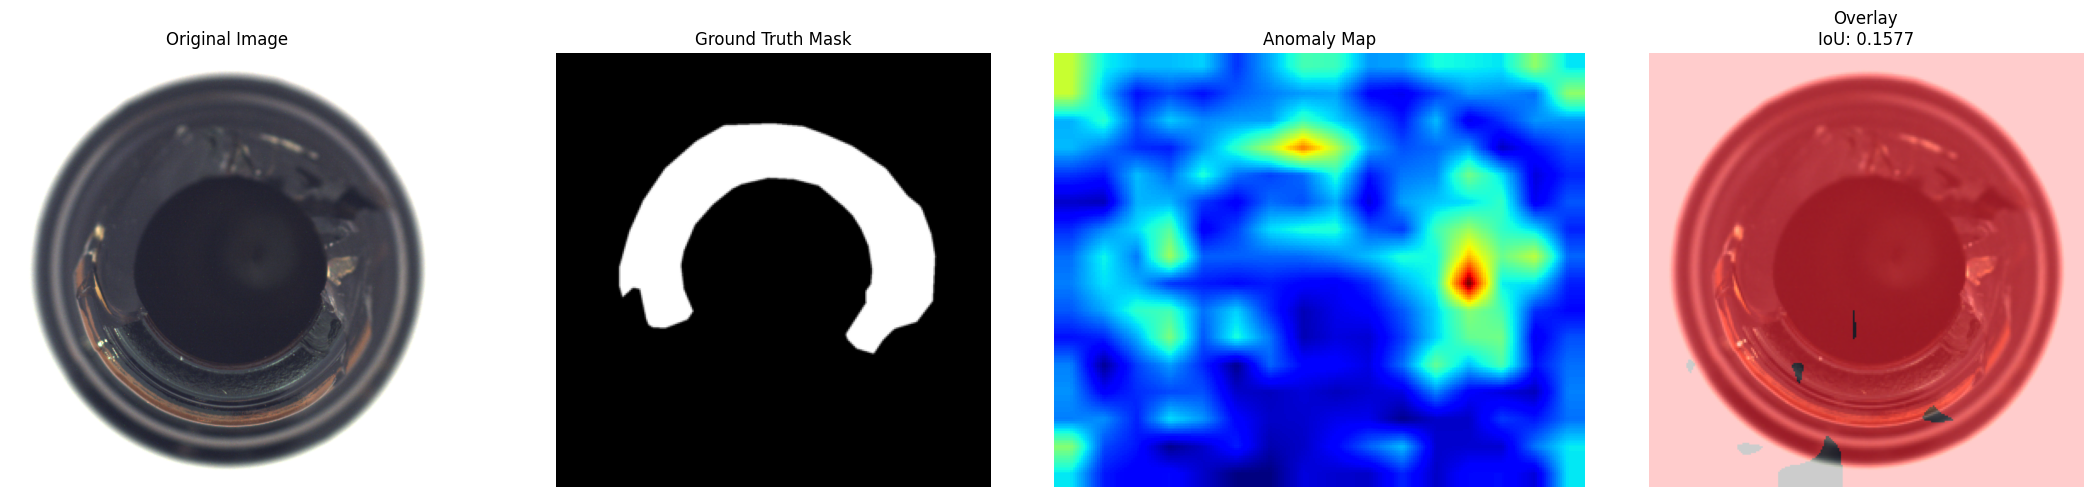

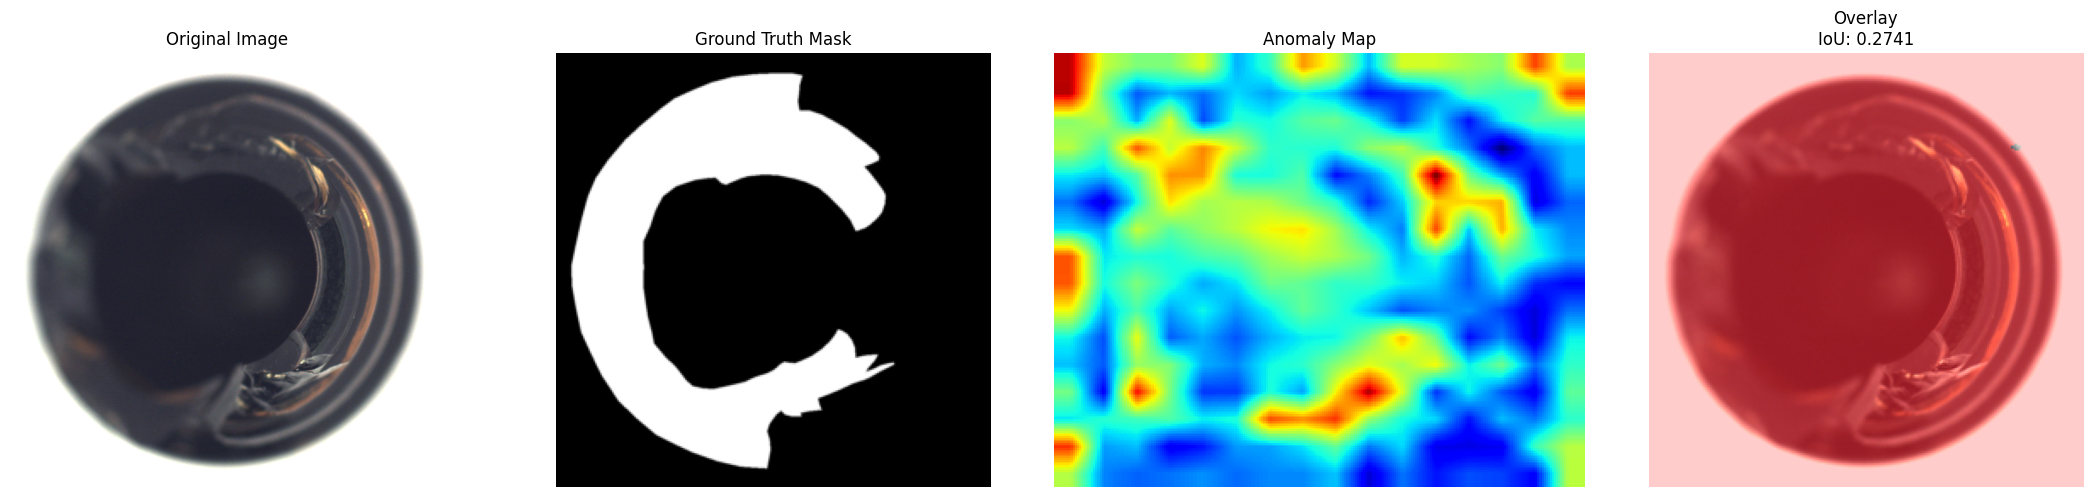

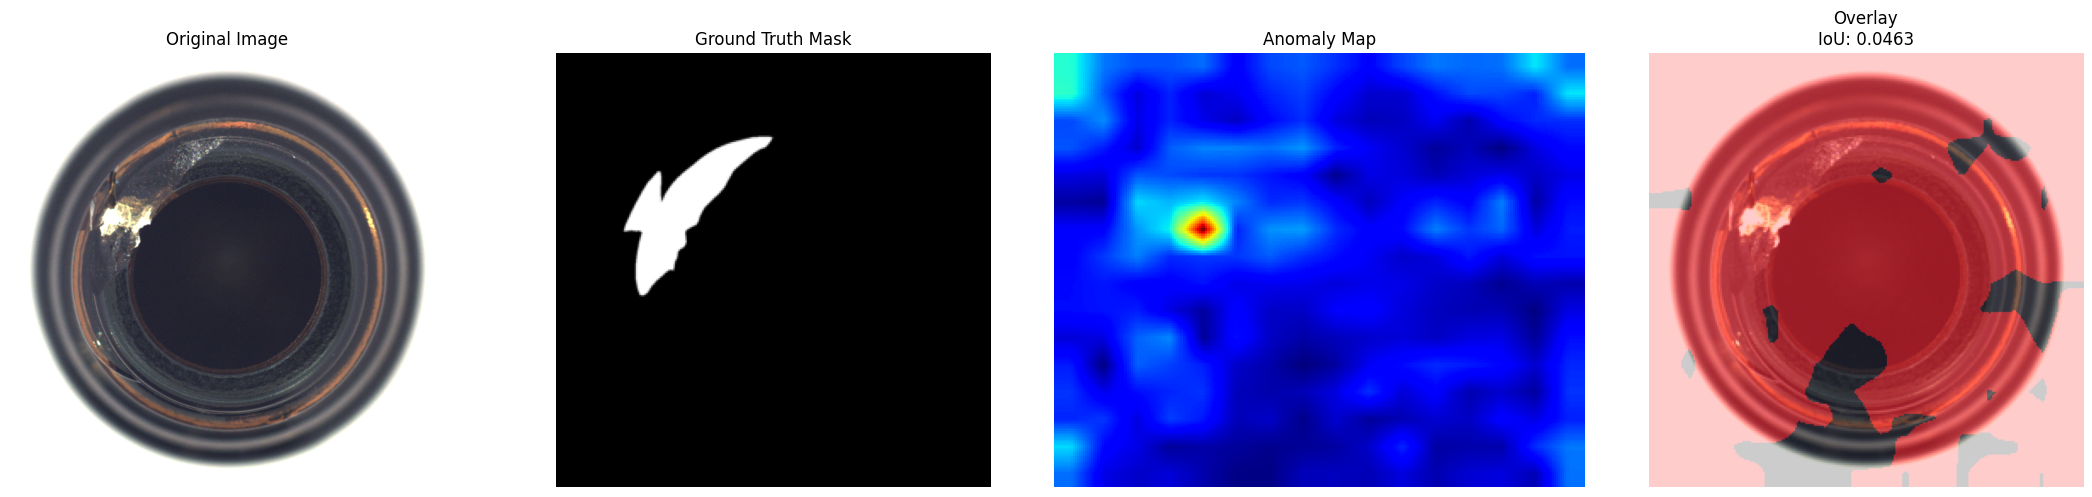

In [2]:
from fastflow.fastflow_train import train_model
from fastflow.fastflow_test import test_model
from tools.dataset import BottleDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

train_dataset = BottleDataset("dataset/bottle/train/good", transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

extractor, flow_model = train_model(train_loader, device, num_epochs=1)
test_model(extractor, flow_model, "dataset/bottle/test/broken_large", "dataset/bottle/ground_truth/broken_large", device)
